<a href="https://colab.research.google.com/github/maticvl/dataHacker/blob/master/pyTorch/006%20Solving%20The%20XOR%20Problem%20Using%20Neural%20Networks%20with%20PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

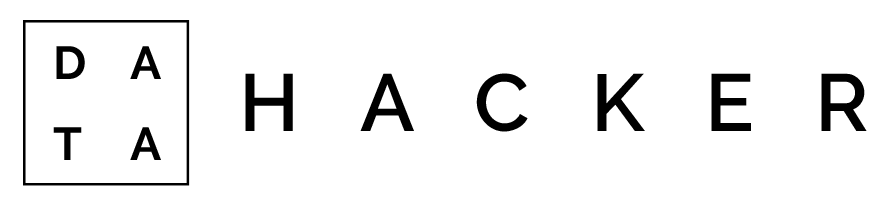
# XOR Problem

In [5]:
import numpy as np
import torch 
import matplotlib.pyplot as plt

## AND function with Logistic Regression

Creating out data for the AND logical operator.

In [6]:
x1 = np.array ([0., 0., 1., 1.], dtype = np.float32)
x2 = np.array ([0., 1., 0., 1.], dtype = np.float32)
y  = np.array ([0., 0., 0., 1.],dtype = np.float32)

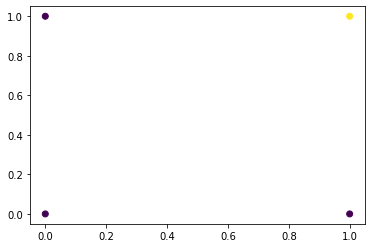

In [7]:
plt.scatter(x1, x2, c=y)

Make a function that will take in two features and one array for the labels and create a dataset out of those points. It will return a split version, meaning, we will obtain a Training and a Testing set. 

In [8]:
def create_dataset(x1, x2, y):
  # Repeat the numbers from x1, x2, and y 50 times
  x1 = np.repeat(x1, 50)
  x2 = np.repeat(x2, 50)
  y =  np.repeat(y,  50)

  # Add noise to data points just to have some data variety
  x1 = x1 + np.random.rand(x1.shape[0])*0.05
  x2 = x2 + np.random.rand(x2.shape[0])*0.05

  # Shuffle
  index_shuffle = np.arange(x1.shape[0])
  np.random.shuffle(index_shuffle)

  x1 = x1.astype(np.float32)
  x2 = x2.astype(np.float32)
  y  = y.astype(np.float32)

  x1 = x1[index_shuffle]
  x2 = x2[index_shuffle]
  y  = y [index_shuffle]

  # Convert data to tensors
  x1_torch = torch.from_numpy(x1).clone().view(-1, 1)
  x2_torch = torch.from_numpy(x2).clone().view(-1, 1)
  y_torch = torch.from_numpy(y).clone().view(-1, 1)

  # Combine X1 and X2
  X = torch.hstack([x1_torch, x2_torch])


  # Split into training and testing
  X_train = X[:150,:]
  X_test  = X[150:,:]
  y_train = y_torch[:150,:]
  y_test  = y_torch[150:,:]

  return X_train, y_train, X_test, y_test

Calling the `create_dataset` function that we created and obtain training and testing datasets.

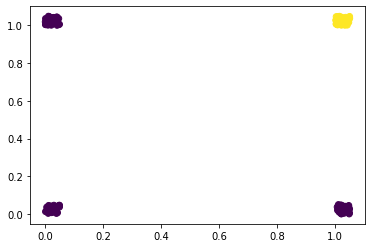

In [9]:
X_train, y_train, X_test, y_test = create_dataset(x1, x2, y)
plt.scatter(X_train[:,0], X_train[:,1], c = y_train)

Create the logistic regression model.\
 We set two input parameters the input dimension (`input_dim`) and output dimension (`output_dim`).

In [10]:
class LogisticRegresion(torch.nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LogisticRegresion, self).__init__()
    self.linear = torch.nn.Linear(input_dim, output_dim)
  
  def forward( self, x):
    x = self.linear(x)
    outputs = torch.sigmoid(x)
    return outputs

Using the `LogisticRegression` class we wil create our first logical operator, the `AND` operator. For the loss we will be using the BCE or Binary cross entropy loss function, and for the optimizer the SGD or Stohastic Gradient descent.

In [12]:
model_AND = LogisticRegresion(2,1)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model_AND.parameters(), lr=0.01)

After those definitions we can move on and create a function for the training. This function accepts a `model` that we want to train, `criterion`, `optimizer`, the `data` and number of `iterations` as input. Inside the training loop we start by making a prediction, and then calculating the loss. We save the loss into a list called, `all_loss`. After the loss calculation, we do a backward pass and then optimize our models parameters and zero the gradients. We will only return the `all_loss` list, because the parameters will be saved even without returning them.

In [13]:
def train(model, criterion, optimizer, X, y, iter):
  all_loss = []
  for epoch in range(iter):
    y_hat = model(X)

    loss = criterion(y_hat, y)

    all_loss.append(loss.item())
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()
  
  return all_loss

Train our `model_AND` operator on the data we defined earlier. The number of iterations will be 50000. You can experiment with this number.

In [14]:
all_loss = train(model_AND, criterion, optimizer, X_train, y_train, 50000)

After the training we can simply scatter the points. By looking at the plot we can see that the data was mostly correctly classified.

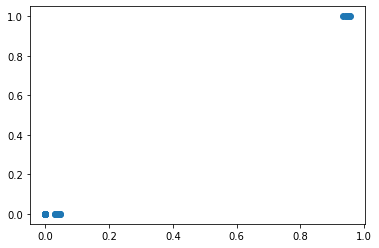

In [15]:
y_pred = model_AND.forward(X_test)

# We should get points (0,0,) and (1,1) if everything is correctly classified
plt.scatter(y_pred.detach().numpy(), y_test)

We saved the loss, and here we will simply plot it. We can see that the loss was gradually dropping, which is the main goal.

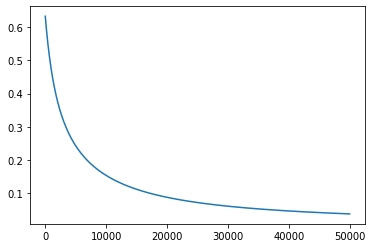

In [16]:
plt.plot(all_loss)

## OR function with Logistic Regression

After we trained our `AND` logical operator, we can start creating the data for the `OR` operator. `x1` and `x2` will be the same, we will just change the output, or the `y` variable.

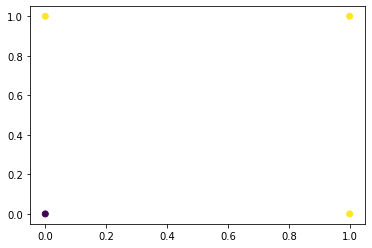

In [17]:
x1 = np.array ([0., 0., 1., 1.], dtype = np.float32)
x2 = np.array ([0., 1., 0., 1.], dtype = np.float32)
y  = np.array ([0., 1., 1., 1. ],dtype = np.float32)
plt.scatter(x1, x2, c=y)

Call the `create_dataset` function and scatter the points.

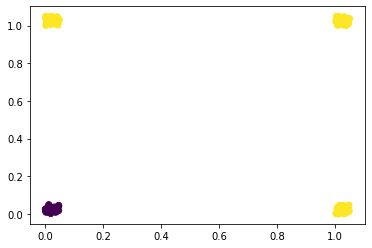

In [18]:
X_train, y_train, X_test, y_test = create_dataset(x1, x2, y)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

Here, we create our `model_OR` and everything will be the same as we did for the `model_AND`.

In [19]:
model_OR = LogisticRegresion(2,1)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model_OR.parameters(), lr=0.01)

In [20]:
all_loss = train(model_OR, criterion, optimizer, X_train, y_train, 50000)

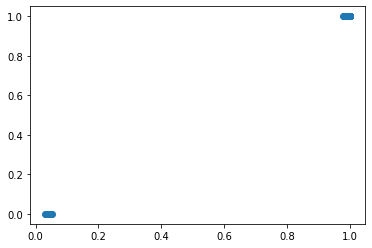

In [21]:
y_pred = model_OR.forward(X_test)
plt.scatter(y_pred.detach().numpy(), y_test)

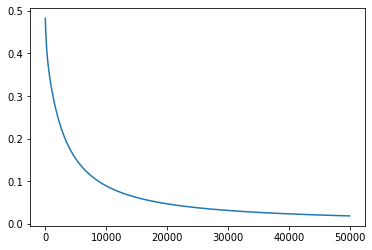

In [22]:
plt.plot(all_loss)

## NAND function with Logistic Regression

After those steps, we can create the data for `NAND`. Again, we just change the `y` data. And all the other steps are the same as for the last two models.

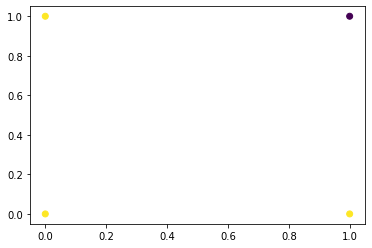

In [23]:
x1 = np.array ([0., 0., 1., 1.], dtype = np.float32)
x2 = np.array ([0., 1., 0., 1.], dtype = np.float32)
y  = np.array ([1., 1., 1., 0.], dtype = np.float32)
plt.scatter(x1, x2, c=y)

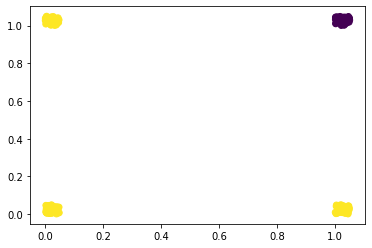

In [24]:
X_train, y_train, X_test, y_test = create_dataset(x1, x2, y)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

In [25]:
model_NAND = LogisticRegresion(2,1)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model_NAND.parameters(), lr=0.01)

In [26]:
all_loss = train(model_NAND, criterion, optimizer, X_train, y_train, 50000)

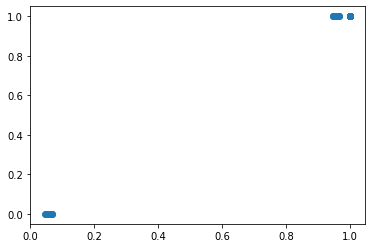

In [27]:
y_pred = model_NAND.forward(X_test)
plt.scatter(y_pred.detach().numpy(), y_test)

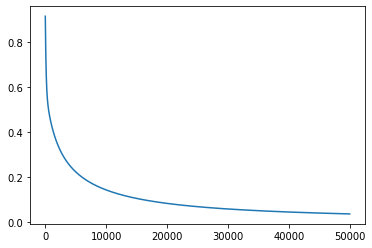

In [28]:
plt.plot(all_loss)

## XOR dataset

Here, we finally create the XOR dataset.\
We will use previously developed `AND`, `OR`, and `NAND` Logistic Regression models to implement a `XOR` using these Logistic regression models. Initially, we apply two (`OR`, `NAND`), and those two outputs are used as inputs into the third one (`AND`). 

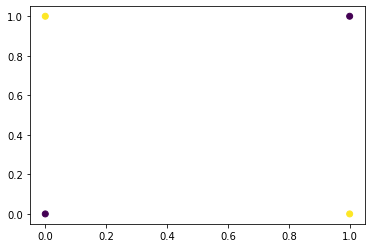

In [29]:
x1 = np.array ([0., 0., 1., 1.], dtype = np.float32)
x2 = np.array ([0., 1., 0., 1.], dtype = np.float32)
y  = np.array ([0., 1., 1., 0. ],dtype = np.float32)
plt.scatter(x1, x2, c=y)

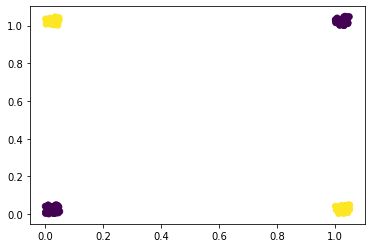

In [30]:
X_train, y_train, X_test, y_test = create_dataset(x1, x2, y)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

For testing purposes we will take the 17th value. As the output we get a value that is close to 0, and if we check the original value, we can see that it is also a value of 0. This means that our model predicted that that point belongs to class 0.

In [34]:
# Do a check for one data point
test = 2

h1 = model_OR.forward(X_test[test])
h2 = model_NAND.forward(X_test[test])
h3 = model_AND.forward(torch.tensor([h1, h2]))

print(h3)
print(y_test[test])

tensor([0.9053], grad_fn=<SigmoidBackward>)
tensor([1.])


In [33]:
# Do a check for one data point
test = 5

h1 = model_OR.forward(X_test[test])
h2 = model_NAND.forward(X_test[test])
h3 = model_AND.forward(torch.tensor([h1, h2]))

print(h3)
print(y_test[test])

tensor([0.0402], grad_fn=<SigmoidBackward>)
tensor([0.])


Now, we can classify classify all the points in the testing set.

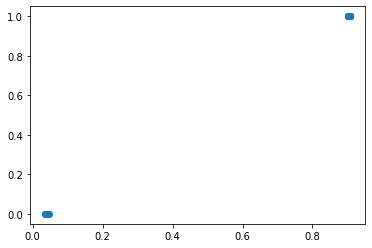

In [35]:
# Create a test for a full batch of data points
h1 = model_OR.forward(X_test)
h2 = model_NAND.forward(X_test)
h3 = model_AND.forward(torch.hstack([h1 , h2]))
plt.scatter(h3.detach().numpy(), y_test)

By scattering the results, we can see that our models predicted almost everything correct.

## IMPLEMENTING XOR WITH DATA AUGMENTATION 
Here, we will introduce a third feature. This feature will be a simple product of x1 and x2. 
 

Because we are going to engineer a third dimension or a third feature, we need to modify the function for creating the dataset.

In [36]:
# Repeat the numbers from x1, x2, and y 50 times
x1 = np.repeat(x1, 50)
x2 = np.repeat(x2, 50)
y =  np.repeat(y,  50)

# Add noise to data points just to have some data variety
x1 = x1 + np.random.rand(x1.shape[0])*0.05
x2 = x2 + np.random.rand(x2.shape[0])*0.05

# Shuffle
index_shuffle = np.arange(x1.shape[0])
np.random.shuffle(index_shuffle)

x1 = x1.astype(np.float32)
x2 = x2.astype(np.float32)
y  = y.astype(np.float32)

x1 = x1[index_shuffle]
x2 = x2[index_shuffle]
y  = y [index_shuffle]

# Convert data to tensors
x1_torch = torch.from_numpy(x1).clone().view(-1, 1)
x2_torch = torch.from_numpy(x2).clone().view(-1, 1)
x3_torch = torch.mul(x1_torch, x2_torch)


# Combine X1 and X2
X = torch.hstack([x1_torch, x2_torch, x3_torch])
y_torch = torch.from_numpy(y).clone().view(-1, 1)

# Split into training and testing
X_train = X[:150,:]
X_test  = X[150:,:]
y_train = y_torch[:150,:]
y_test  = y_torch[150:,:]

In [37]:
model_XOR = LogisticRegresion(3,1)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model_XOR.parameters(), lr=0.01)

In [38]:
all_loss = train(model_XOR, criterion, optimizer, X_train, y_train, 50000)

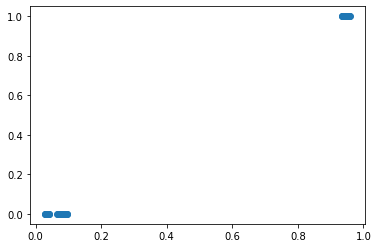

In [39]:
y_pred = model_XOR.forward(X_test)
plt.scatter(y_pred.detach().numpy(), y_test)